In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
!pip install -Uq fastai2
import fastai2
from fastai2.vision import *

!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastbook import *
from fastai.vision.widgets import *

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pathlib import Path

In [ ]:
faces = 'ayanami_rei', 'souryuu_asuka_langley', 'kamado_nezuko', 'nagisa_kaworu'
path = 'gdrive/MyDrive/AI Image Classifier'
p_path=Path(path)
fns = get_image_files(path)
fns

(#247) [Path('gdrive/MyDrive/AI Image Classifier/nagisa_kaworu/10003.jpg'),Path('gdrive/MyDrive/AI Image Classifier/nagisa_kaworu/10023.jpg'),Path('gdrive/MyDrive/AI Image Classifier/nagisa_kaworu/10018.jpg'),Path('gdrive/MyDrive/AI Image Classifier/nagisa_kaworu/10001.jpg'),Path('gdrive/MyDrive/AI Image Classifier/nagisa_kaworu/10002.jpg'),Path('gdrive/MyDrive/AI Image Classifier/nagisa_kaworu/10004.jpg'),Path('gdrive/MyDrive/AI Image Classifier/nagisa_kaworu/10005.jpg'),Path('gdrive/MyDrive/AI Image Classifier/nagisa_kaworu/10006.jpg'),Path('gdrive/MyDrive/AI Image Classifier/nagisa_kaworu/10007.jpg'),Path('gdrive/MyDrive/AI Image Classifier/nagisa_kaworu/10009.png')...]

In [ ]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(96))

In [ ]:
dls = dls.dataloaders(path)

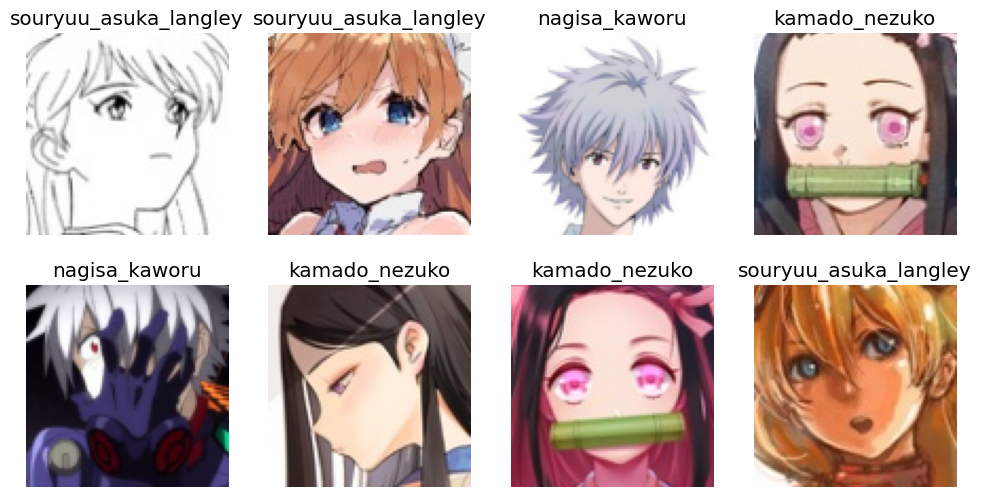

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

In [ ]:
learn = vision_learner(dls, resnet101, metrics=[accuracy,error_rate],)
learn.fine_tune(6)

epoch,train_loss,valid_loss,accuracy,error_rate,time
0,2.280233,0.964939,0.673469,0.326531,00:56


epoch,train_loss,valid_loss,accuracy,error_rate,time
0,0.874573,0.438932,0.775510,0.224490,01:08
1,0.693019,0.307471,0.897959,0.102041,01:00
2,0.516435,0.337310,0.877551,0.122449,01:01
3,0.399731,0.431965,0.877551,0.122449,00:58
4,0.328850,0.412451,0.836735,0.163265,00:59
5,0.282314,0.390893,0.836735,0.163265,00:59


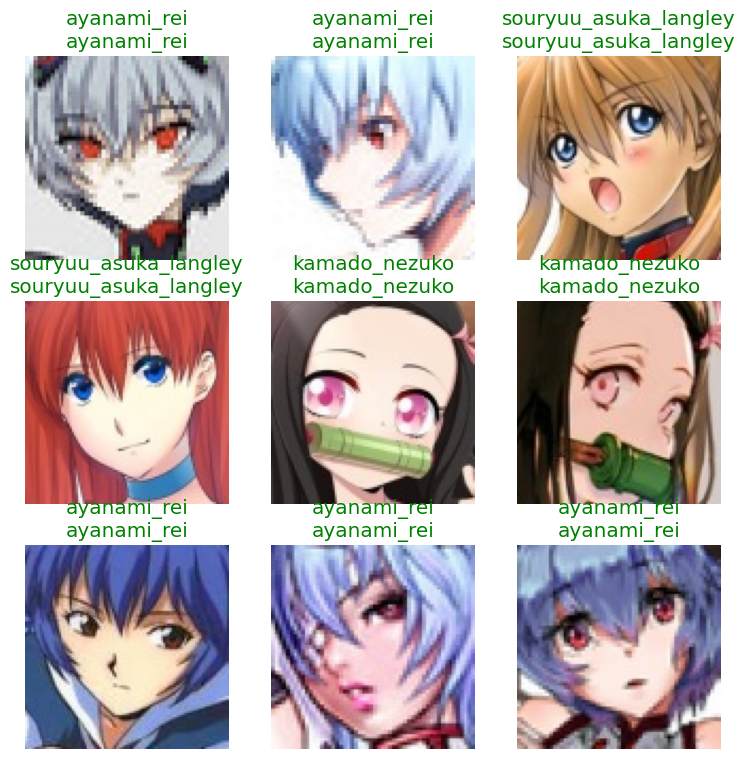

In [ ]:
learn.show_results()

<Axes: >

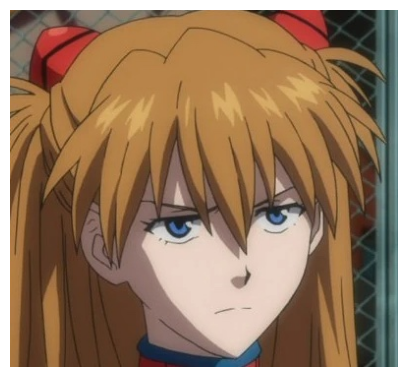

In [ ]:
img1 = PILImage.create('gdrive/MyDrive/dataset/1.jpg')
img1.show()

In [ ]:
learn.predict(img1)[0]

'souryuu_asuka_langley'

<Axes: >

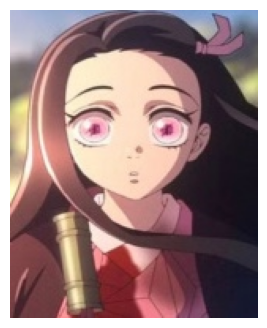

In [ ]:
img2 = PILImage.create('gdrive/MyDrive/dataset/10002.jpg')
img2.show()

In [ ]:
learn.predict(img2)[0]

'kamado_nezuko'

<Axes: >

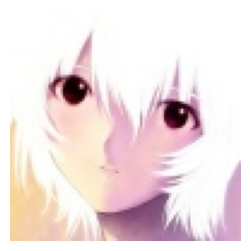

In [ ]:
img3 = PILImage.create('gdrive/MyDrive/dataset/2.jpg')
img3.show()

In [ ]:
learn.predict(img3)[0]

'ayanami_rei'